<p style="font-size:25px;">**Before using this notebook:**

1. Oranize dynamic light scattering data into an excel doc where each row corresponds to a particle diameter. Each sample should be on its own sheet, and replicate measurments can be placed into adjacent columns.

<p style="font-size:25px;">Load required packages, import data, plot
<p style="font-size:12px;"> First, set parameter values:
<p style="font-size:12px;"> filepath = string specifying the location of excel doc containing your data
<p style="font-size:12px;"> samples = list of strings corresponding to label for each sample on your excel sheet
<p style="font-size:12px;"> sizes_label = string label for the column containing diameter values
<p style="font-size:12px;"> intensity_replicates_labels = list of strings corresponding to label for each column containing replicate intensity measurments
<p style="font-size:12px;"> colors_list = list containing strings for a color to plot each sample


In [1]:
filepath = r'D:/093025 NASA backup/Dynamic light scattering/2024/082324/082324 DLS data.xlsx'
samples =['50uL aqueous, 1to100 dilution', '25uL aqueous, 1to100 dilution', '10uL aqueous, 1to100 dilution', '5uL aqueous, 1to100 dilution']
sizes_label = 'Size (d.nm)'
intensity_replicate_labels = ['Intensity (%)', 'Intensity (%).1', 'Intensity (%).2']
colors_list = ['k', 'gray', 'darkgray', 'r']


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import matplotlib as mpl
import matplotlib.image as mpimg
from scipy import ndimage
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as mpatches
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import os
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
from scipy.stats import linregress
from matplotlib.font_manager import FontProperties
from scipy.stats import poisson


In [3]:
def import_data(pathI, sheetI, sizeI, replicatesI):
    df1 = pd.read_excel(pathI, sheet_name = sheetI)
    diameter = list(df1[sizeI][1:])
    intensities = []
    for i in range(len(replicatesI)):
        intensities.append(list(df1[replicatesI[i]][1:]))
    avg = []
    stdev = []
    for i in range(len(diameter)):
        data = [intensities[x][i] for x in range(len(replicatesI))]
        avg.append(np.mean(data))
        stdev.append(np.std(data, ddof = 1))
    datasetI = (diameter, avg, stdev)
    return(datasetI)

def plot_data(axI, diameter, avg, stdev, colorI, labelI):
    #axI.plot(diameter, avg, color= colorI, linewidth = 5)
    axI.errorbar(diameter, avg, yerr = [0]*len(stdev), color= colorI, markersize = 10, capsize = 0, elinewidth = 0, marker = 'o', linewidth = 5, label = labelI, zorder = 10)

def plot_data_w_errorbars(axI, diameter, avg, stdev, colorI, labelI):
    #axI.plot(diameter, avg, color= colorI, linewidth = 5)
    axI.errorbar(diameter, avg, yerr = stdev, color= colorI, markersize = 10, capsize = 5, elinewidth = 1, marker = 'o', linewidth = 5, label = labelI, zorder = 10)
    
def plot_params(axI):
    axI.set_xlabel('Droplet diameter (nm)', fontsize = 30, labelpad = 0)
    axI.set_ylabel('DLS Intensity', fontsize=30)
    axI.set_xlim([50, 1000])
    axI.set_xscale('log')
    #axI.set_xticks([10, 100, 1000, 10000])
    #axI.yaxis.offsetText.set_visible(False)
    #axI.set_ylim([0, 4500])
    #axI.set_yticks([0, 1e3, 2e3, 3e3, 4e3])
    axI.tick_params(axis='y',labelsize=30, length = 5, width = 1)
    axI.tick_params(axis='x',labelsize=30, length = 5, width = 1)
    for s in ['top', 'right', 'bottom', 'left']:
        axI.spines[s].set_linewidth(5)
    axI.legend(bbox_to_anchor= (1.0, 0.35), fontsize = 25, facecolor = 'white')
    axI.set_ylim([-0.5,16])
    locmajx = mpl.ticker.LogLocator(base=10,numticks=100) 
    locminx = mpl.ticker.LogLocator(base=10,subs=np.arange(2, 10) * .1,numticks=100) # subs=(0.2,0.4,0.6,0.8)
    axI.xaxis.set_major_locator(locmajx)
    axI.xaxis.set_minor_locator(locminx)
    axI.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
    
    
def plot_params_linear_axis(axI):
    axI.set_xlabel('Vesicle diameter (nm)', fontsize = 30, labelpad = 0)
    axI.set_ylabel('DLS Intensity', fontsize=30)
    #ax.set_xscale('log')
    #axI.yaxis.offsetText.set_visible(False)
    #axI.set_ylim([0, 4500])
    #axI.set_yticks([0, 1e3, 2e3, 3e3, 4e3])
    axI.tick_params(axis='y',labelsize=30, length = 5, width = 1)
    axI.tick_params(axis='x',labelsize=30, length = 5, width = 1)
    for s in ['top', 'right', 'bottom', 'left']:
        axI.spines[s].set_linewidth(5)
    axI.legend(bbox_to_anchor= (1.25, 1), fontsize = 25, facecolor = 'white')
    axI.set_ylim([-5,100])
    

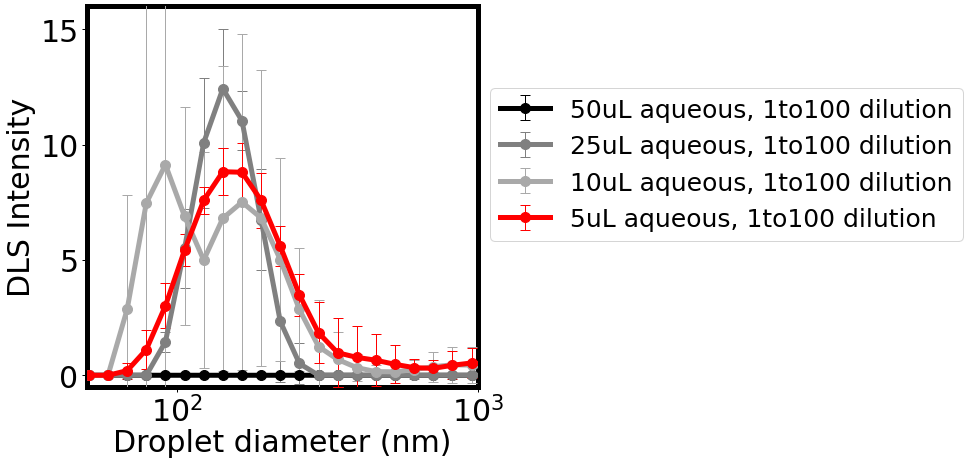

In [4]:
# Show average of all 3 runs for each sample

fig, ax = plt.subplots(1, 1, figsize = (7,7))

for i in range(len(samples)):
    sheetI = samples[i]
    sample1 = import_data(filepath, sheetI, sizes_label, intensity_replicate_labels)
    plot_data_w_errorbars(ax, sample1[0], sample1[1], sample1[2], colors_list[i], sheetI)
plot_params(ax)



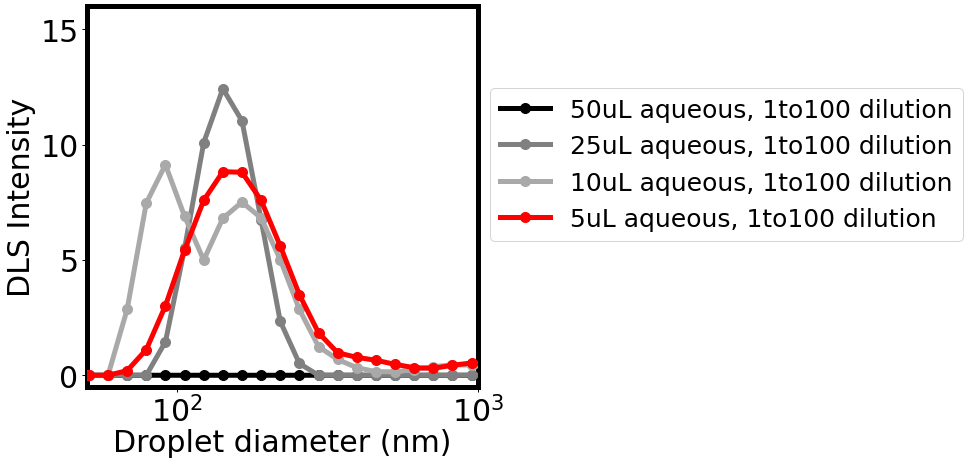

In [5]:
# Show average of all 3 runs for each sample

fig, ax = plt.subplots(1, 1, figsize = (7,7))

for i in range(len(samples)):
    sheetI = samples[i]
    sample1 = import_data(filepath, sheetI, sizes_label, intensity_replicate_labels)
    plot_data(ax, sample1[0], sample1[1], sample1[2], colors_list[i], sheetI)
plot_params(ax)



<p style="font-size:25px;">Plot data and calculate probability of encapsulating a molecule at given concentration
<p style="font-size:12px;"> First, set parameter values:
<p style="font-size:12px;"> molecule_conc = concentration of molecule for which you want to estimate probability of encapsulation
<p style="font-size:12px;"> molecule_color = color to display the estimated probabilities


In [6]:
filepath = r'D:/093025 NASA backup/Dynamic light scattering/2024/082324/082324 DLS data.xlsx'
samples = ['25uL aqueous, 1to100 dilution']
sizes_label = 'Size (d.nm)'
intensity_replicate_labels = ['Intensity (%)', 'Intensity (%).1', 'Intensity (%).2']
colors_list = ['gray']
molecule_conc = [100e-9] # molar
molecule_color = ['r']


In [7]:
def calculate_distribution(DNA_conc, vesicle_diameters):
    probabilities = []
    for d in vesicle_diameters:
        vesicle_volume = (4/3)*np.pi*(d/2)**3 # cubic nanometers
        vesicle_volume_liters = vesicle_volume*(1e-24) # liters
        expected_value = DNA_conc * vesicle_volume_liters*6.022e23 # average number of DNAs per vesicle. This is mu in scipy documentation
        probability = 1 - poisson.cdf(1, expected_value) # For given expected value, CDF(1, expected_value) gives probability of having less than or equal to 1 DNA per vesicle
        probabilities.append(probability)
    return(probabilities)

def make_plot_log(axI, x, y, DNA_conc, colorI):
    axI.errorbar(x, y, yerr = [0]*len(y), color= colorI, markersize = 10, capsize = 0, elinewidth = 0, marker = 'o', linewidth = 2.5, label = str(DNA_conc*1e9) + ' nM', zorder = 10)
    axI.set_ylim([-0.05,1.05])
    axI.set_xlabel('Vesicle diameter (nm)', fontsize = 30, labelpad = 0)
    axI.set_ylabel('Probability of having more\nthan 1 DNA per vesicle', fontsize=30)
    axI.set_xlim([50, 10000])
    axI.set_xscale('log')
    #axI.set_xticks([10, 100, 1000, 10000])
    axI.tick_params(axis='y',labelsize=30, length = 5, width = 1)
    axI.tick_params(axis='x',labelsize=30, length = 5, width = 1)
    axI.tick_params(axis='x',which = 'minor', labelsize=30, length = 4, width = 1)
    for s in ['top', 'right', 'bottom', 'left']:
        axI.spines[s].set_linewidth(5)
    axI.legend(bbox_to_anchor= (1.25, 1), fontsize = 25, facecolor = 'white')


    locmajx = mpl.ticker.LogLocator(base=10,numticks=100) 
    locminx = mpl.ticker.LogLocator(base=10,subs=np.arange(2, 10) * .1,numticks=100) # subs=(0.2,0.4,0.6,0.8)

    axI.xaxis.set_major_locator(locmajx)
    axI.xaxis.set_minor_locator(locminx)
    axI.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
    
def make_plot_linear(axI, x, y, DNA_conc, colorI):
    axI.errorbar(x, y, yerr = [0]*len(y), color= colorI, markersize = 10, capsize = 0, elinewidth = 0, marker = 'o', linewidth = 2.5, label = str(DNA_conc*1e9) + ' nM', zorder = 10)
    axI.set_ylim([-5,105])
    axI.set_xlabel('Vesicle diameter (nm)', fontsize = 30, labelpad = 0)
    axI.set_ylabel('Probability of having more\nthan 1 DNA per vesicle', fontsize=30)
    axI.set_xlim([50, 60])
    axI.set_xticks([100, 200, 300, 400, 500])
    axI.tick_params(axis='y',labelsize=30, length = 5, width = 1)
    axI.tick_params(axis='x',labelsize=30, length = 5, width = 1)
    axI.tick_params(axis='x',which = 'minor', labelsize=30, length = 4, width = 1)
    for s in ['top', 'right', 'bottom', 'left']:
        axI.spines[s].set_linewidth(5)
    axI.legend(bbox_to_anchor= (1.25, 1), fontsize = 25, facecolor = 'white')
    

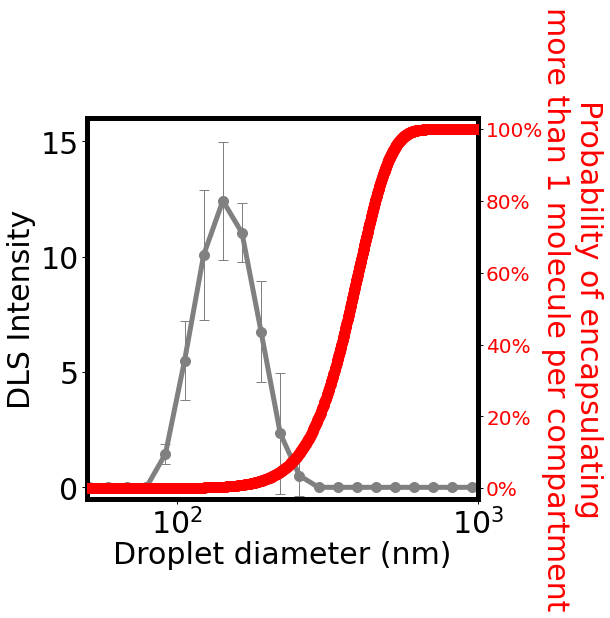

In [8]:
# Show average of all 3 runs for each sample
fig, ax = plt.subplots(1, 1, figsize = (7,7))
ax2 = ax.twinx()

vesicle_diameters = [x for x in range(1,1000)] # nanometers
for c in range(len(molecule_conc)):
    probabilities = calculate_distribution(molecule_conc[c], vesicle_diameters)
    p100 = [x*100 for x in probabilities]
    make_plot_log(ax2, vesicle_diameters, p100, molecule_conc[c], molecule_color[c])
ax2.set_ylabel('Probability of encapsulating\nmore than 1 molecule per compartment', rotation = -90, size = 30, labelpad = 60, color = 'r')
ax2.tick_params(axis='y',labelsize=20, length = 5, width = 1)
ax2.set_ylim([-3, 103])
ax2.set_xlim([1,1000])
ax2.set_yticks([0, 20, 40, 60, 80, 100])
ax2.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'], color = 'r')
ax2.legend(bbox_to_anchor= (1.5, 1.5), fontsize = .1, facecolor = 'white')
#ax2.text(700, 90, '50nM DNA', size = 20, color = 'r')
#ax2.text(840, 40, '10nM\n DNA', size = 20, color = 'darkred')
#ax2.text(570, 3, '1nM DNA', size = 20, color = 'firebrick')

for i in range(len(samples)):
    sheetI = samples[i]
    sample1 = import_data(filepath, sheetI, sizes_label, intensity_replicate_labels)
    plot_data_w_errorbars(ax, sample1[0], sample1[1], sample1[2], colors_list[i], sheetI)
plot_params(ax)
ax2.get_legend().remove()
ax.get_legend().remove()

